0 - import libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

1 - dataset preparation and preview

In [33]:
cost_df = pd.read_csv('EconomiesOfScale.csv')

In [34]:
cost_df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [35]:
cost_df.tail()

,Number of Units,Manufacturing Cost
995,8.099710,23.855067
996,8.739752,27.536542
997,8.780888,25.973787
998,8.897700,25.138311
999,10.000000,21.547777


In [36]:
cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [37]:
cost_df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [38]:
cost_df.shape

(1000, 2)

In [39]:
cost_df.isnull().sum()

Number of Units       0
Manufacturing Cost    0
dtype: int64

In [40]:
cost_df.duplicated().sum()

np.int64(0)

2 - data visualization

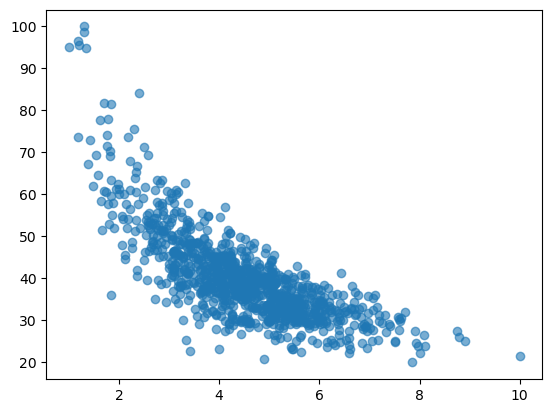

In [41]:
plt.scatter(data=cost_df, x='Number of Units', y= 'Manufacturing Cost', alpha=0.6)

<Axes: xlabel='Number of Units', ylabel='Manufacturing Cost'>

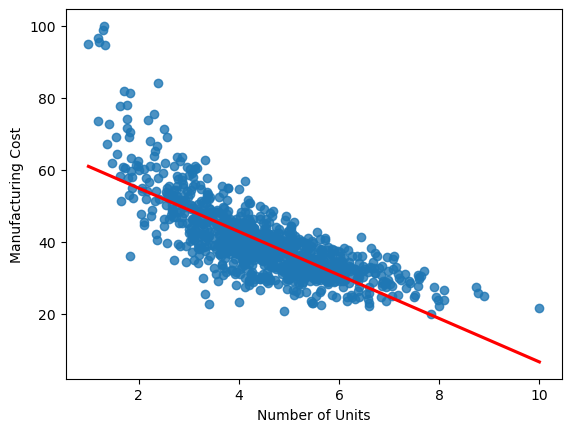

In [42]:
sns.regplot(data=cost_df, x='Number of Units', y='Manufacturing Cost', line_kws={'color':'red'}, ci=False)

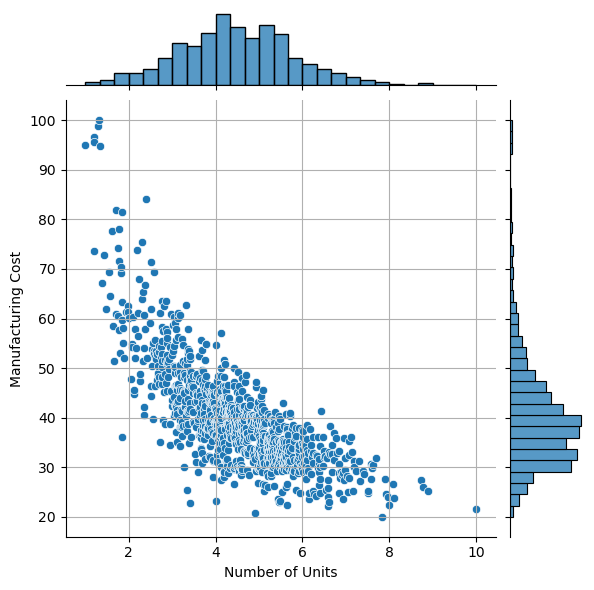

In [43]:
sns.jointplot(data=cost_df, x='Number of Units', y='Manufacturing Cost')
plt.grid()

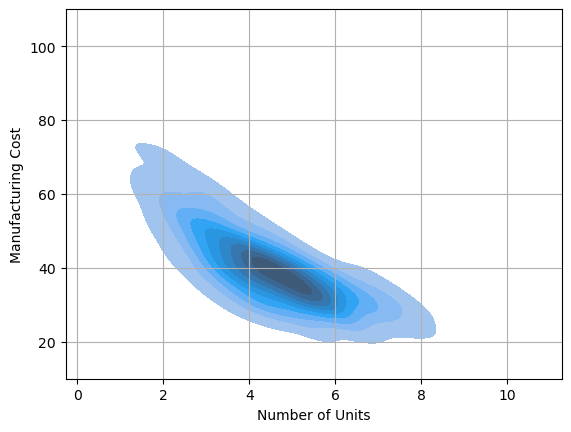

In [44]:
sns.kdeplot(data=cost_df, x='Number of Units', y='Manufacturing Cost', fill=True)
plt.grid()

3 - data splitting

In [45]:
X = cost_df[['Number of Units']].values
y = cost_df[['Manufacturing Cost']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 1)
y_train shape: (800, 1)
X_test shape: (200, 1)
y_test shape: (200, 1)


4 - linear regression

In [47]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
print("Linear with intercept:")
print("coef:", lr.coef_)
print("intercept:", lr.intercept_)

Linear with intercept:
coef: [[-6.21850698]]
intercept: [67.89012909]


In [48]:
lr_2 = LinearRegression(fit_intercept=False)
lr_2.fit(X_train, y_train)
print("Linear without intercept:")
print("coef:", lr_2.coef_)
print("intercept:", lr_2.intercept_)

Linear without intercept:
coef: [[7.750607]]
intercept: 0.0


5 - polynomial regression

In [49]:
poly_models = {}

pf2 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly2 = pf2.fit_transform(X_train)

poly2_model = LinearRegression().fit(X_train_poly2, y_train)

poly_models[2] = (pf2, poly2_model)
print(f"Degree 2 trained. Coeff count: {poly2_model.coef_}\n")




pf3 = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly3 = pf3.fit_transform(X_train)

poly3_model = LinearRegression().fit(X_train_poly3, y_train)

poly_models[3] = (pf3, poly3_model)
print(f"Degree 3 trained. Coeff count: {poly3_model.coef_}\n")




degrees = [4, 5, 10]

for d in degrees:
    pf = PolynomialFeatures(degree=d, include_bias=False)
    Xtr = pf.fit_transform(X_train)
    m = LinearRegression().fit(Xtr, y_train)


    poly_models[d] = (pf, m)
    print(f"Degree {d} trained. Coeff count: {m.coef_}\n")



Degree 2 trained. Coeff count: [[-17.81636965   1.27181952]]

Degree 3 trained. Coeff count: [[-34.51814321   5.05171512  -0.26070502]]

Degree 4 trained. Coeff count: [[-5.48053513e+01  1.21644641e+01 -1.26644861e+00  4.90848244e-02]]

Degree 5 trained. Coeff count: [[-9.54138252e+01  3.19305847e+01 -5.63692225e+00  4.94554373e-01
  -1.69105527e-02]]

Degree 10 trained. Coeff count: [[ 1.10238517e+03 -1.74010398e+03  1.39097753e+03 -6.61718277e+02
   2.00207516e+02 -3.95127833e+01  5.06589940e+00 -4.06355861e-01
   1.85064465e-02 -3.64845343e-04]]



In [50]:
poly_models

{2: (PolynomialFeatures(include_bias=False), LinearRegression()),
 3: (PolynomialFeatures(degree=3, include_bias=False), LinearRegression()),
 4: (PolynomialFeatures(degree=4, include_bias=False), LinearRegression()),
 5: (PolynomialFeatures(degree=5, include_bias=False), LinearRegression()),
 10: (PolynomialFeatures(degree=10, include_bias=False), LinearRegression())}

6 - plot polynomial


In [51]:
def plot_polynomial(poly, model, X, y, degree):
    X_poly = poly.transform(X)
    y_pred = model.predict(X_poly)

    sorted_index = np.argsort(X.flatten())
    X_sorted = X[sorted_index]
    y_sorted = y_pred[sorted_index]
    
    plt.figure(figsize=(6,4))
    plt.scatter(X_train, y_train, color='orange', alpha=0.3, label='train Data')
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Real Data')
    plt.plot(X_sorted, y_sorted, color='red', label=f'Degree {degree}')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Number of Units')
    plt.ylabel('Manufacturing Cost')
    plt.legend()
    plt.show()


7 - predict on test data and visualization

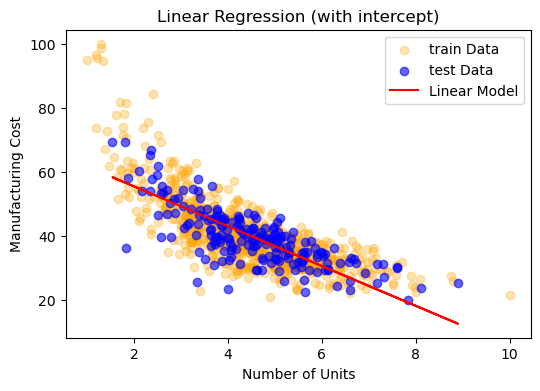

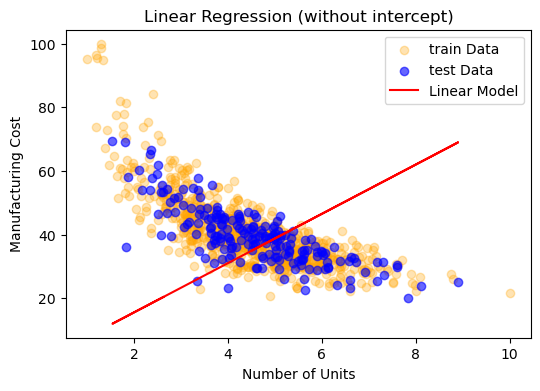

In [52]:
y_pred_linear1 = lr.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='orange', alpha=0.3, label='train Data')
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='test Data')
plt.plot(X_test, y_pred_linear1, color='red', label='Linear Model')
plt.title('Linear Regression (with intercept)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.show()


y_pred_linear2 = lr_2.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, color='orange', alpha=0.3, label='train Data')
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='test Data')
plt.plot(X_test, y_pred_linear2, color='red', label='Linear Model')
plt.title('Linear Regression (without intercept)')
plt.xlabel('Number of Units')
plt.ylabel('Manufacturing Cost')
plt.legend()
plt.show()

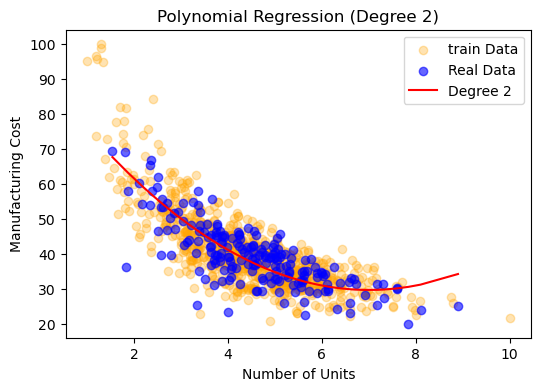

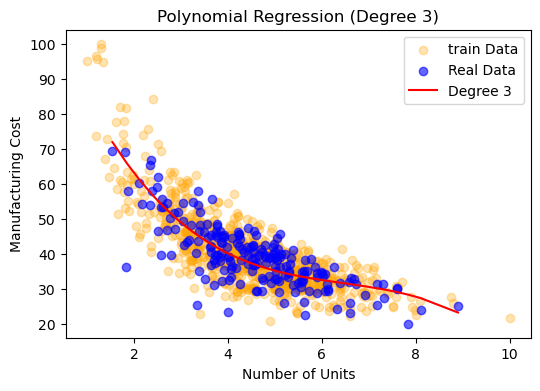

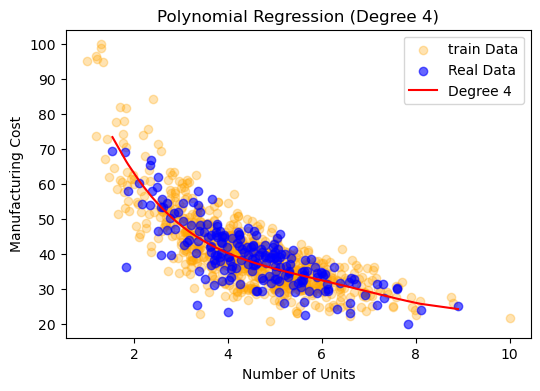

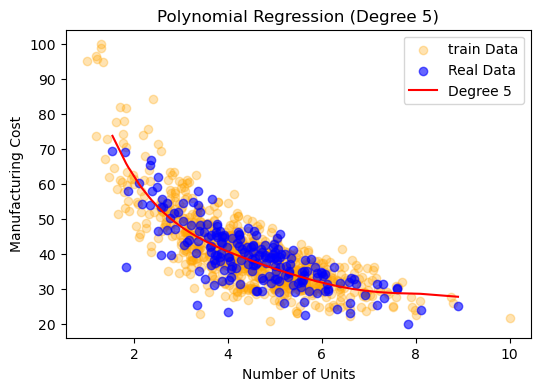

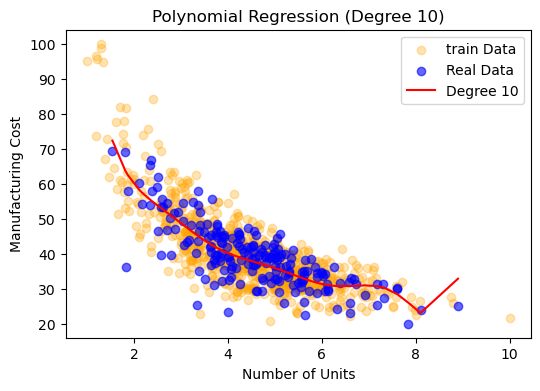

In [53]:
for degree, (poly, model) in poly_models.items():
    plot_polynomial(poly, model, X_test, y_test, degree)

8 - evaluate the model


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, root_mean_squared_error

In [55]:
def model_evaluate(y_true, y_pred, model_name="Model"):
    metrics = {
        "Model": model_name,
        "MAE": mean_absolute_error(y_true, y_pred),
        "MSE": mean_squared_error(y_true, y_pred),
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "R2 score": r2_score(y_true, y_pred),
        "MAPE": mean_absolute_percentage_error(y_true, y_pred)
    }
    return pd.DataFrame([metrics])

In [56]:
linear_models = [('linear with intercept', lr), ('linear without intercept',lr_2)]
linear_models

[('linear with intercept', LinearRegression()),
 ('linear without intercept', LinearRegression(fit_intercept=False))]

In [57]:
poly_models

{2: (PolynomialFeatures(include_bias=False), LinearRegression()),
 3: (PolynomialFeatures(degree=3, include_bias=False), LinearRegression()),
 4: (PolynomialFeatures(degree=4, include_bias=False), LinearRegression()),
 5: (PolynomialFeatures(degree=5, include_bias=False), LinearRegression()),
 10: (PolynomialFeatures(degree=10, include_bias=False), LinearRegression())}

In [58]:
results_train = pd.DataFrame()

for name, model in linear_models:
    results_train = pd.concat([results_train, model_evaluate(y_train, model.predict(X_train), name)])
    
for degree, (poly, model) in poly_models.items():
    y_pred_train = model.predict(poly.transform(X_train))
    results_train = pd.concat([results_train, model_evaluate(y_train, y_pred_train, f"Polynomial (Degree {degree})")])

print('train data:')
results_train

train data:


,Model,MAE,MSE,RMSE,R2 score,MAPE
0,linear with intercept,5.053413,50.299188,7.092192,0.579692,0.129081
0,linear without intercept,15.400603,431.977345,20.784065,-2.609669,0.368057
0,Polynomial (Degree 2),4.615917,38.753553,6.225235,0.676169,0.116794
0,Polynomial (Degree 3),4.541783,35.832562,5.986031,0.700578,0.114682
0,Polynomial (Degree 4),4.502111,35.171553,5.930561,0.706101,0.113712
0,Polynomial (Degree 5),4.458309,34.769846,5.896596,0.709458,0.112797
0,Polynomial (Degree 10),4.425039,34.121893,5.841395,0.714872,0.112093


In [59]:
results_test = pd.DataFrame()

for name, model in linear_models:
    results_test = pd.concat([results_test, model_evaluate(y_test, model.predict(X_test), name)])
    
for degree, (poly, model) in poly_models.items():
    y_pred_test = model.predict(poly.transform(X_test))
    results_test = pd.concat([results_test, model_evaluate(y_test, y_pred_test, f"Polynomial (Degree {degree})")])

print('test data')
results_test

test data


,Model,MAE,MSE,RMSE,R2 score,MAPE
0,linear with intercept,4.513944,35.197389,5.932739,0.569590,0.123820
0,linear without intercept,14.372445,347.775738,18.648746,-3.252766,0.364747
0,Polynomial (Degree 2),4.372293,33.226567,5.764249,0.593690,0.119000
0,Polynomial (Degree 3),4.282632,32.287774,5.682233,0.605170,0.115208
0,Polynomial (Degree 4),4.245119,31.561637,5.617974,0.614049,0.113732
0,Polynomial (Degree 5),4.269145,31.503539,5.612801,0.614760,0.114762
0,Polynomial (Degree 10),4.237102,30.864841,5.555614,0.622570,0.113822
